# WEEK 2 IP - EXPLORATORY DATA ANALYSIS

# 1. Defining the question

### a) Specifying the data analytic question

* The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania and Uganda from the years 2016-2018

### b) Defining the Metric for Success

The metric of success will be shown by our ability to show individuals who are most likely to use a bank account or those who use a bank account. The following areas will be covered to achieve the objective successfully:

* Exploratory Data Analysis

* Univariate, Bivariate and Multivariate Analaysis

* Visualizations

* Reduction Techniques

* Multiple Regression Model

### c) Understanding the context

One of the main obstacles to economic and human development is financial inclusion. In Kenya, Tanzania, Uganda and Rwanda only 9.1 million adults (13.9% of the adult population) have access or use a commercial bank account. Access to bank accounts has been regarded, traditionally, as an indicator of financial inclusion. Majority of African adults do not have access or use a commercial bank account. The objective of the study is to provide an indication of the state of financial inclusion in Kenya, Tanzania, Uganda and Rwanda through prediction of which individuals are most likely to have access or use a commercial bank account. Access to bank accounts is a vital contributor to long-term economic growth. Banks play a pivotal role in facilitating financial service access in Africa regardless of the growth of innovative fintech solutions and proliferation of mobile money. Advantages of access to bank accounts to households is the ability to save and facilitate payments. Other advantages include improvement of access to other financial services and helping businesses build up their credit-worthiness.

Variable Definitions/ Data Dictionary: http://bit.ly/VariableDefinitions

### d) Recording the Experimental Design

The methodology that will be used to conduct this project includes the following steps:

* Conduct Exploratory Data Analysis

* Univariate, Bivariate and Multivariate Analysis

* Create Visualizations

* Apply Reduction Techniques

* Create a Multiple Regression Model

* Challenge the solution to evaluate whether it is the best for this project

### e) Data Relevance

The data provided contains crucial variables which can be used for the prediction which is the purpose of the study. Thus, the data provided fits the context of the study. The main dataset contains the financial services individuals use in East Africa and demographic information. It was extracted from various Finscope surveys ranging from 2016 to 2018. More information is provided in the following links:

FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/

Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016

Finscope Tanzania 2017: http://www.fsdt.or.tz/finscope/

Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/

Dataset Files:

Dataset: http://bit.ly/FinancialDataset

Variable Definitions: http://bit.ly/VariableDefinitions

# 2) Reading the data

In [494]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

import sklearn as sk
import pandas_profiling as pp
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# loading our dataset
financial_df = pd.read_csv('Financial Dataset - 1.csv')

# 3) Checking the data

In [495]:
# Determine the number of records in the file 
print("The data has " + str(financial_df.shape[0]) + " rows and " + str(financial_df.shape[1]) + " columns.")

The data has 23524 rows and 13 columns.


In [496]:
# previewiing the top of our dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [497]:
# Previewing the bottom of our dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [498]:
# Checking whether each column has an appropriate datatype
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [499]:
# Checking information of the dataset
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [500]:
# checking the columns 
financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [501]:
# check for basic descriptive statistics for the numeric columns
financial_df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# 4) Tidying the Dataset

In [502]:
# Drop irrelevant columns 
financial_df = financial_df.drop(['uniqueid'], axis = 1)
financial_df.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [503]:
# renaming the columns to be uniform
financial_df.columns = ['country','year','has_a_bank_account','type_of_location','cell_phone_access','household_size','respondents_age','gender_of_respondent','the_relationship_with_head','marital_status','level_of_education','type_of_job']
financial_df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondents_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


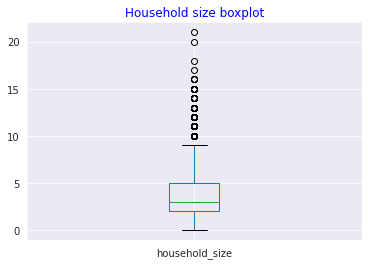

In [504]:
# checking for outliers on variable household_size
financial_df.boxplot(['household_size'])
plt.title("Household size boxplot" , color = 'blue')
plt.show()
# the boxplot shows presence of outliers

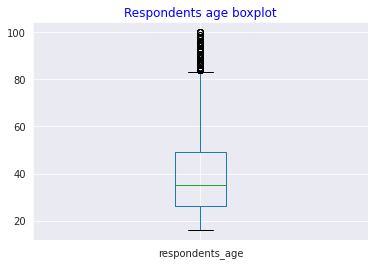

In [505]:
# checking for outliers on variable respondents_age
financial_df.boxplot(['respondents_age'])
plt.title("Respondents age boxplot" , color = 'blue')
plt.show()
# the boxplot shows presence of outliers

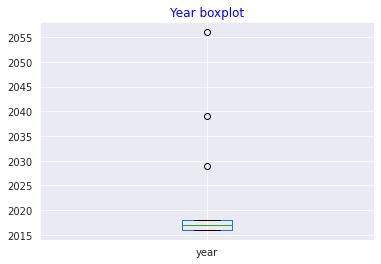

In [506]:
# checking for outliers on variable year
financial_df.boxplot(['year'])
plt.title("Year boxplot" , color = 'blue')
plt.show()
# the boxplot shows presence of outliers

In [507]:
# removing outliers in the year column
outliers = financial_df[financial_df['year'] > 2018].index
financial_df.drop(outliers, inplace=True)
financial_df.shape

(23521, 12)

In [508]:
 # checking for anomalies
 financial_df['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [509]:
# removing anomalies using percentile
max_threshold = financial_df['household_size'].quantile(0.95)
print(max_threshold)
df2 = financial_df[financial_df['household_size']<= max_threshold]
print(df2.shape)
print(df2.describe())
print(df2['household_size'].unique())

8.0
(22760, 12)
               year  household_size  respondents_age
count  22760.000000    22760.000000     22735.000000
mean    2016.964938        3.475264        38.902661
std        0.842019        1.979997        16.563180
min     2016.000000        0.000000        16.000000
25%     2016.000000        2.000000        26.000000
50%     2017.000000        3.000000        35.000000
75%     2018.000000        5.000000        49.000000
max     2018.000000        8.000000       100.000000
[3. 5. 8. 7. 1. 6. 4. 2. 0.]


In [510]:
# identify missing data
df2.isnull().sum()

country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                 0
respondents_age               25
gender_of_respondent          29
the_relationship_with_head     0
marital_status                27
level_of_education            28
type_of_job                   29
dtype: int64

In [511]:
# dealing with missing data
df2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [512]:
# confirm there are no missing data
df2.isnull().sum()

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondents_age               0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

In [513]:
# checking for duplicates
df2 = df2.drop_duplicates(inplace=False)
df2.shape

(18262, 12)

# 5) Exploratory Analysis
>Univariate Analysis

>Measures of Central Tendency
* MEAN

In [514]:
# Mean of respondents household_size
df2.household_size.mean()

3.504271164166028

Average household size is 3

In [515]:
# Mean of respondents age
df2.respondents_age.mean()

39.672379805059684

Average age of the respondents was 39

>MODE

In [516]:
# mode of household_size
df2.household_size.mode()

0    2.0
dtype: float64

Most households size consists of two members

In [517]:
# mode of respondents age 
df2.respondents_age.mode()

0    30.0
dtype: float64

>The most occuring age was 30

In [518]:
# mode of the dataset
df2.mode()
print(df2.mode())

  country  year  ... level_of_education    type_of_job
0  Rwanda  2018  ...  Primary education  Self employed

[1 rows x 12 columns]


*   2018 is the year with the most dataset
*   Level of education for most people was Primary education
*   Self employed is the job with the most counts


>MEDIAN

In [519]:
# median of the household_size
df2.household_size.median()

3.0

In [520]:
# median of the respondents_age
df2.respondents_age.median()

36.0

>RANGE

In [521]:
# Range of the household_size

hMax = df2.household_size.max()
print(hMax)

hMin = df2.household_size.min()
print(hMin)

hRange = hMax - hMin
hRange

8.0
0.0


8.0

>The household size range is 8

In [522]:
# Range of the respondent_age

aMax = df2.respondents_age.max()
print(aMax)

aMin = df2.respondents_age.min()
print(aMin)

aRange = aMax - aMin
aRange

100.0
16.0


84.0

> The respondent age range, the difference between the highest and lowest value, is 84.

>QUANTILES

In [523]:
# Quantiles of the household_size
df2["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [524]:
# Quantiles of the respondent_age

df2["respondents_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    36.0
0.75    50.0
Name: respondents_age, dtype: float64

>In the respondent age column, the first quartile is 26, the second quartile is 36 and the third quartile is 50.

STANDARD DEVIATION

In [525]:
# Standard Deviation of the household_size
df2.household_size.std()


2.0153450919691096

In [526]:
# Standard Deviation of the respondent_age
df2.respondents_age.std()

17.135468273491682

VARIANCE

In [527]:
# Variance of the household_size
df2.household_size.var()

4.061615839723979

In [528]:
# Variance of the respondents_age
df2.respondents_age.var()


293.62427295184

SKEWNESS

In [529]:
# Skewness of the household_size
df2.household_size.skew()

0.49545754628474314

The household size distribution is skewed to the right since its skewness is a positive value.

In [530]:
# Skewness of the respondents_age
df2.respondents_age.skew()

0.769934307831812

The age distribution is skewed to the right since its skewness is a positive value.

In [531]:
# Kurtosis of the household_size
df2.household_size.kurt()

-0.7655294049042745

The kurtosis of the household size is platykurtic since it is lesser than 0.

In [532]:
# Kurtosis of the respondents_age
df2.respondents_age.kurt()

-0.11066599030474444

The kurtosis of the respondents_age is platykurtic since it is lesser than 0.

>VISUALIZATION
* PIECHARTS

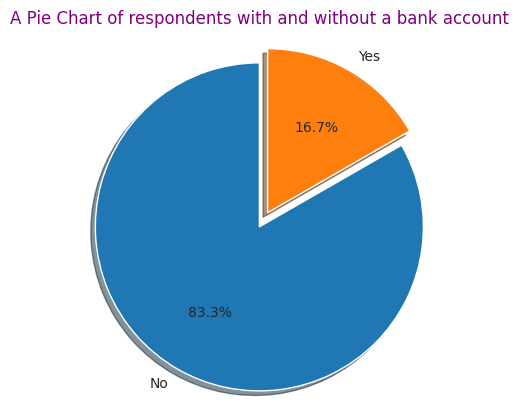

In [533]:
# A pie chart of the respondents who had/ had no bank account

# Group  data to be plotted

account = df2.has_a_bank_account.value_counts()
account

# Access the data to plot

# labels
sizes= account.index
sizes

# values
data = account.values
data

# Plot the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'purple')
plt.show()


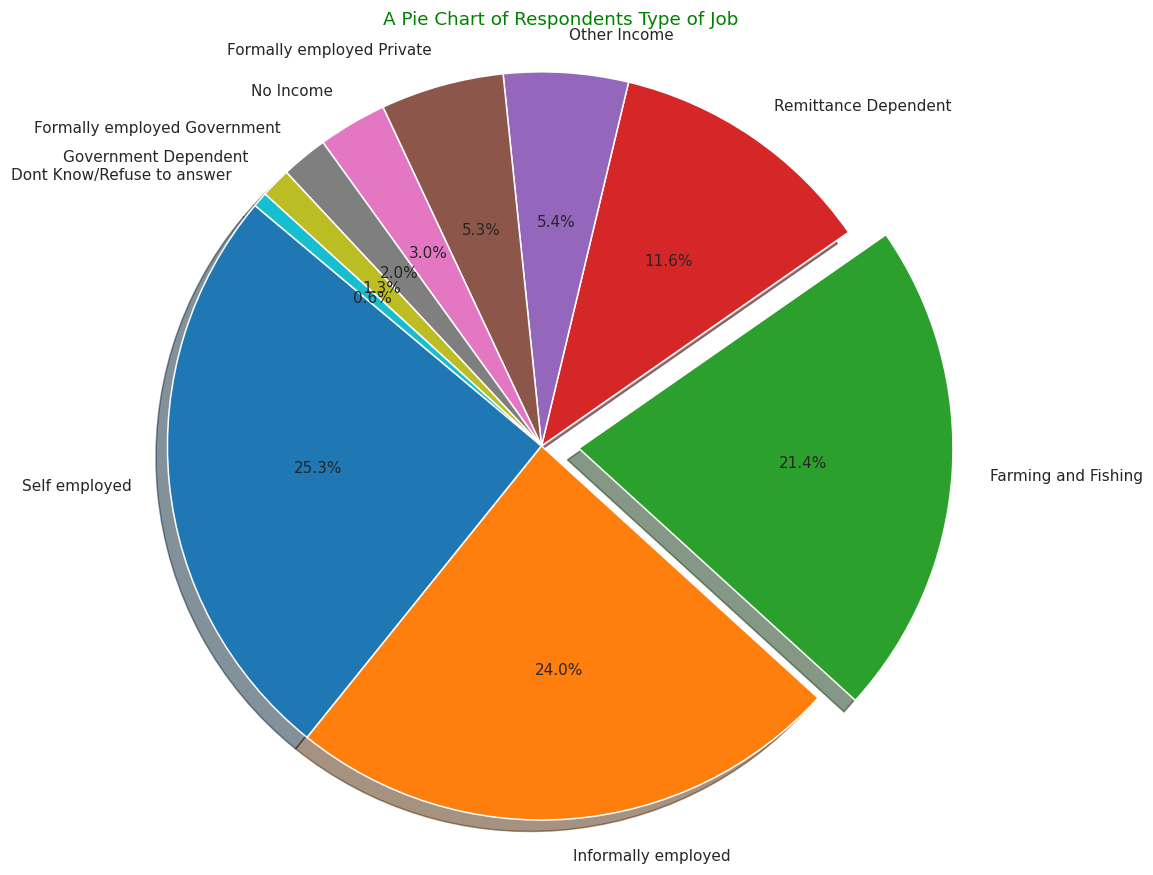

In [534]:
# A pie chart of the respondents type of job

# Group the data to be plotted

job = df2.type_of_job.value_counts()
job

# Access the data to plot

# Labels
sizes1= job.index
sizes1

# values
data1 = job.values
data1

# plotting the pie chart

plt.figure(figsize = (10,10), dpi = 110)
plt.pie(data1, labels = sizes1, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0,0,0,0,0,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of Respondents Type of Job', color = 'green')
plt.show()

* BARCHARTS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


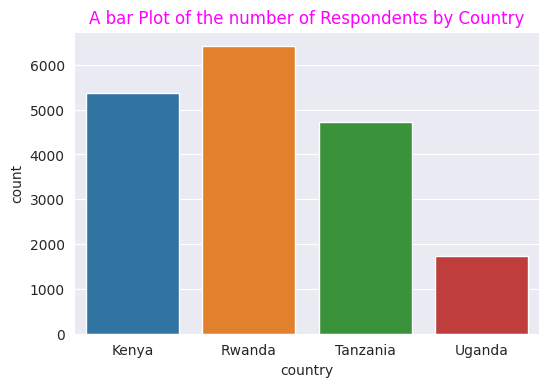

In [535]:
# Plotting a bar plot of the respondent country
# We use seaborn to create a bar chart
# Specify our chart size
# Give a title to the chart
# Display the chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df2.country)
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')
plt.show()

>Majority of the respondents were from Rwanda and the least from Uganda

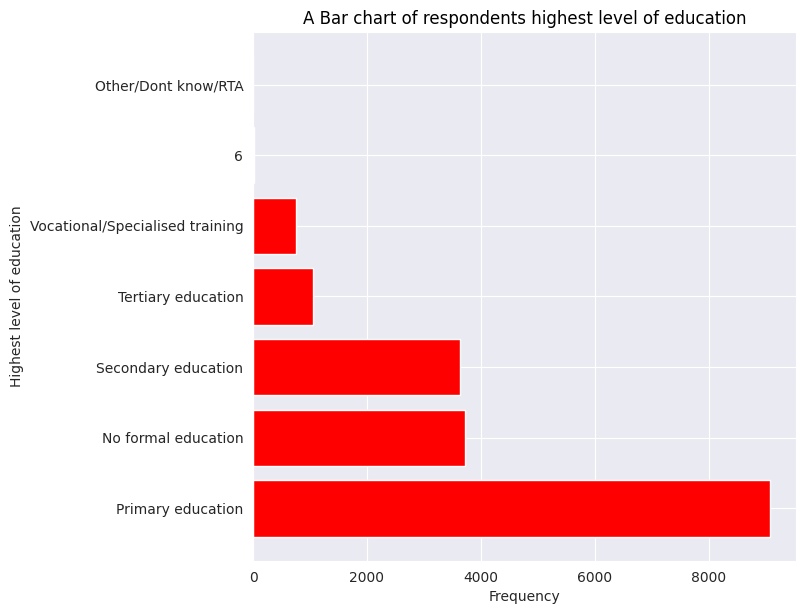

In [536]:
# Plotting a bar plot of the highest level of education of the respondents
# Group data to plot


Education = df2.level_of_education.value_counts()
Education

# Access data to plot

# labels
sizes2= Education.index
sizes2

# values
data2 = Education.values
data2

# Using matplotlib to create a bar chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes2, data2, color = 'red')
plt.ylabel("Highest level of education")
plt.xlabel('Frequency')
plt.title("A Bar chart of respondents highest level of education", color = 'black')
plt.show()

>most respondents' highest level of education was the primary school

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


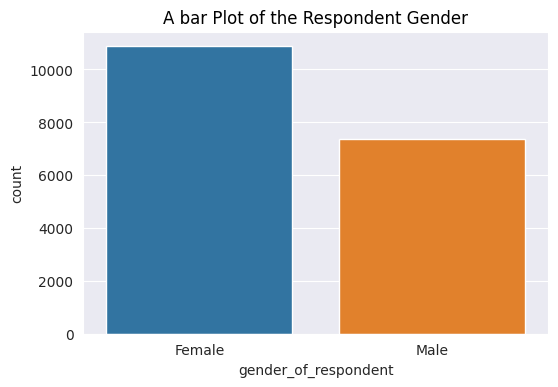

In [537]:
# Plotting a bar plot of the respondent gender 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df2.gender_of_respondent)
plt.title('A bar Plot of the Respondent Gender', color = 'black')
plt.show()

The bar chart shows that there were more female respondents than male respondents 

HISTOGRAMS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


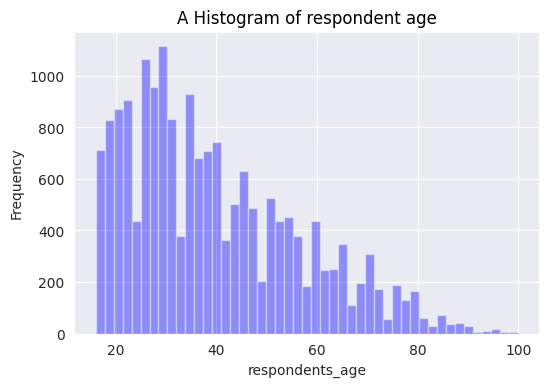

In [538]:
# Histogram of respondent age
# Use seaborn to create a histogram
# Labeling the y axis
# Give a title to our chart and display our chart
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.distplot(df2['respondents_age'], kde = False, color = 'blue')  
plt.title('A Histogram of respondent age', color = 'black')
plt.ylabel('Frequency')
plt.show()

the age distribution is skewed to the right

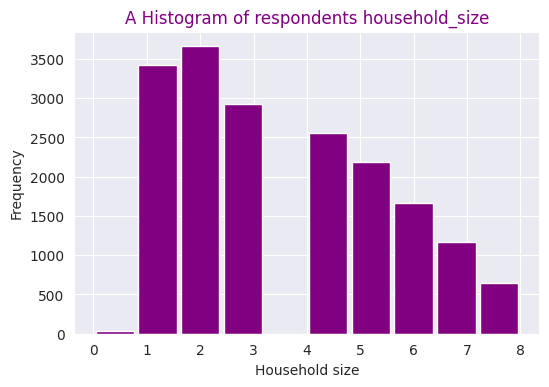

In [539]:
# Histogram of respondent household size
# Using matplotlib to create a histogram
# Label the x axis and y axis
# Give a title to our chart and display our chart
plt.figure(dpi = 100)
plt.hist(df2['household_size'], bins = 10, histtype = 'bar', rwidth = 0.9, color = 'purple')
plt.xlabel('Household size')
plt.ylabel('Frequency')
plt.title('A Histogram of respondents household_size', color = 'purple')
plt.show()

FREQUENCY TABLES

In [540]:
# Frequency table of type of locations categories and their value counts
# Making a cross tab and naming the count column
location = pd.crosstab(index = df2['type_of_location'], columns = 'count')
location

col_0,count
type_of_location,
Rural,11122
Urban,7140


Majority of respondents were from the rural areas

In [541]:
# Frequency table of cell_phone_access categories and their value counts
# Making a cross tab and naming the count column
phone = pd.crosstab(index = df2['cell_phone_access'], columns = 'count')
phone 

col_0,count
cell_phone_access,
No,4773
Yes,13489


Most respondents had access to a cell phone

In [542]:
# Frequency table of interviewee martial status categories and their value counts
# Making a cross tab and naming the count column
marital = pd.crosstab(index = df2['marital_status'], columns = 'count')
marital

col_0,count
marital_status,
Divorced/Seperated,1900
Dont know,8
Married/Living together,8224
Single/Never Married,5777
Widowed,2353


Majority of the respondents were married and lived together

BIVARIATE

>VISUALIZATION

1.   Scatter Plot




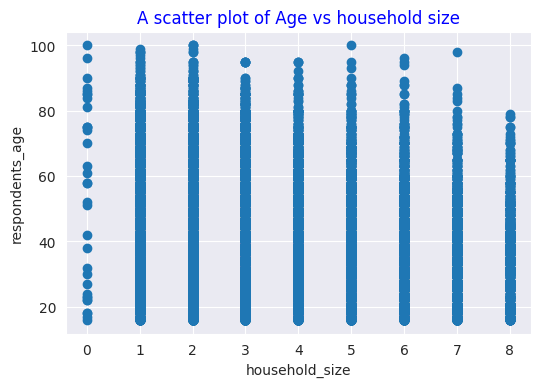

In [543]:
# This is the analysis of two different variables to find their causes and relationships between them 
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables
# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df2['household_size'], df2['respondents_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'blue')

# Labelling the x axis
plt.xlabel('household_size')

# Labelling the y axis
plt.ylabel('respondents_age')

# We then display our scatterplot 
plt.show()

There is no correlation between age and household size in the dataset

2.   Line Charts



In [544]:
# Selecting a few observations in each column to plot a line graph
# There are too many observations to plot allusing the iloc to select 50 rows  
# previewing the selection

df3 = df2.iloc[0:50,-7:-5] 
df3.head()

,household_size,respondents_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


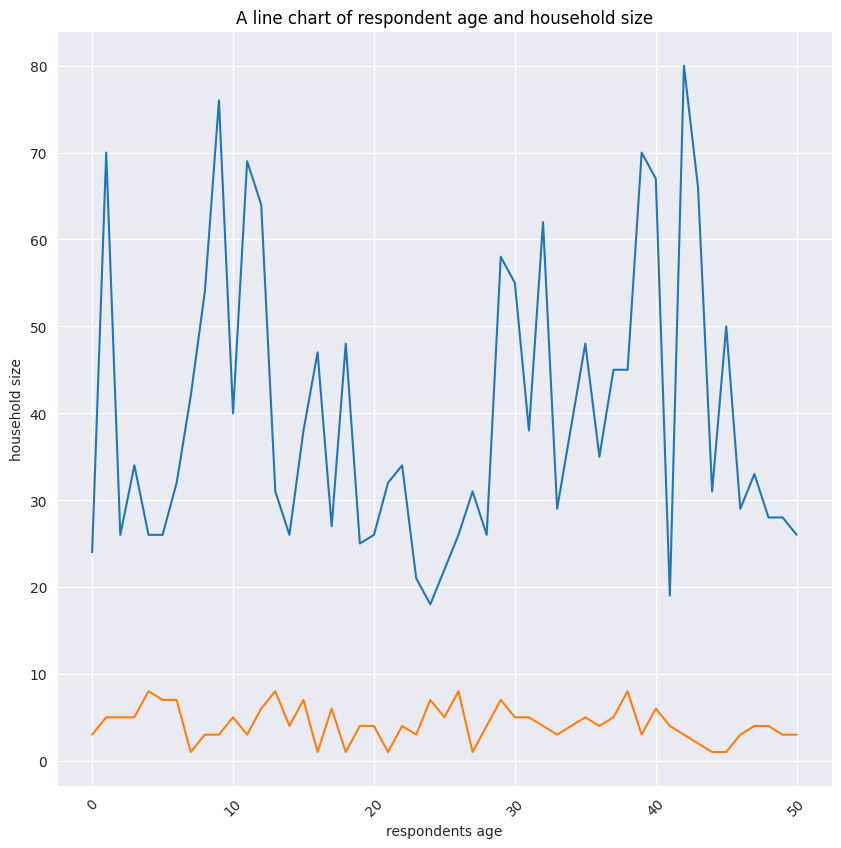

In [545]:
# Line chart of the respondent age and household size for the first 50 rows only# figure size specifications
# creating a line chart using matplotlib
# Rotating our x axis ticks, labelling the title, labelling the x axis and labelling the y axis
plt.figure(figsize = (10,10), dpi = 100)
plt.plot(df3[['respondents_age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'Black')
plt.xlabel('respondents age')
plt.ylabel('household size')
plt.show()

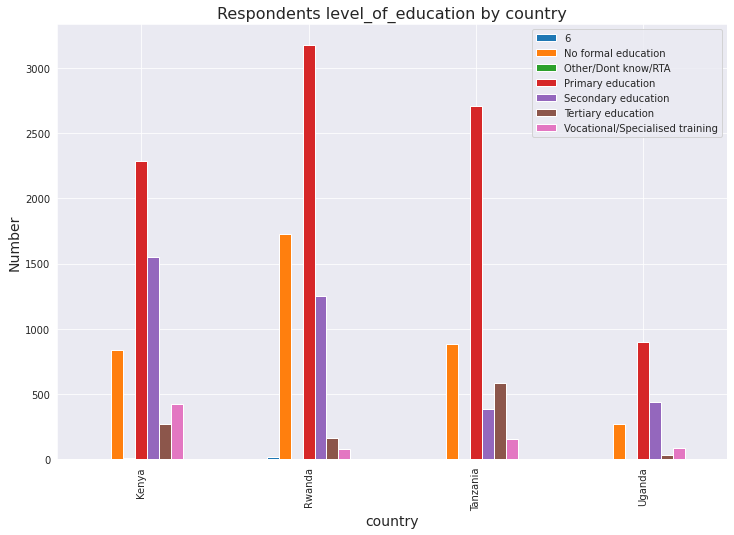

In [546]:
#Side by side bar graph on respondents level of education by country

#First grouping the dataframe by the two variables
df2.groupby(['country','level_of_education']).count()
df2.groupby(['country','level_of_education']).year.count().unstack()

#Plotting our bar graph 
df2.groupby(['country','level_of_education']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Respondents level_of_education by country',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)


The primary level of education is the most common for majority of our respondents

Text(0, 0.5, 'Number')

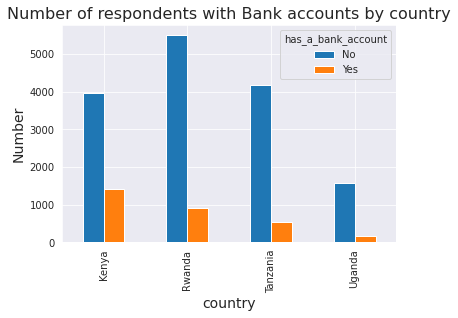

In [547]:
#Side by side bar graph on respondents with banks accounts by country

#First grouping the dataframe by the two variables
df2.groupby(['country','has_a_bank_account']).count()
df2.groupby(['country','has_a_bank_account']).year.count().unstack()

#Plotting our bar graph 
df2.groupby(['country','has_a_bank_account']).year.count().unstack().plot(kind='bar')

# labels and title
plt.title('Number of respondents with Bank accounts by country',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)


* Across all countries most respondents dont have bank accounts
* Rwanda has the highest number without bank accounts and Kenya highest number with banks accounts

Correlation

In [548]:
pcorr = df2["respondents_age"].corr(df2["household_size"], method="pearson") 
print(pcorr)


-0.12462107879439584


the correlation coefficent of Age and Household is -0.12, this means that Age and Household have a very weak negative correlation.

In [549]:
# Calculating the pearson coefficient of the entire dataframe

df2.corr() 

,year,household_size,respondents_age
year,1.000000,-0.084304,-0.036156
household_size,-0.084304,1.000000,-0.124621
respondents_age,-0.036156,-0.124621,1.000000


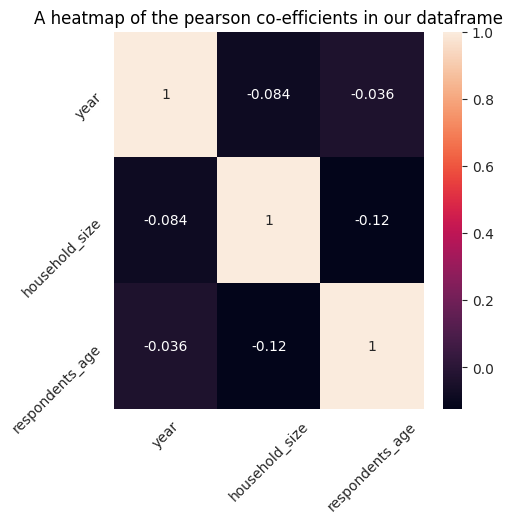

In [550]:
# Heatmap
# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart
x = df2.corr()
plt.figure(figsize = (5,5), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "Black")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

All the variables have weak negative correlation with other variables

MULTIVARIATE ANALYSIS

In [560]:
# checking for relationship between dependent and independent variable
df2.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondents_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Reduction Techniques

* Linear Discriminant Analysis (LDA)

In [552]:
# Step 1
# Divide dataset into features (z) and corresponding labels (s)
# and then divide the resultant dataset into training and test sets. 

# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.

z = df4.iloc[:, 12:].values
s = df4.iloc[:, 2].values

In [553]:
z

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [554]:
s

['Yes', 'No', 'Yes', 'No', 'No', ..., 'No', 'No', 'No', 'No', 'No']
Length: 18262
Categories (2, object): ['No', 'Yes']

In [555]:
# Step 2: 
# Divide data into training and test sets
#
from sklearn.model_selection import train_test_split

z_train, z_test, s_train, s_test = train_test_split(z, s, test_size=0.2, random_state=0)

In [556]:
# step 3
# Performing feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z_train = sc.fit_transform(z_train)
z_test = sc.transform(z_test)

In [557]:
# step 4
# Performing LDA with Scikit-Learn. 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=24)
z_train = lda.fit_transform(z_train, s_train)
z_test = lda.transform(z_test)

 
# The n_components parameter of the LDA, refers to the number of linear discriminates that we want to retrieve. 
# We fit and transform methods to retrieve the linear discriminants.
# Incase of LDA, the transform method takes two parameters: the z_train and the s_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(38, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [558]:
# step 5
# Training and Making Predictions
# Using random forest classifier to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(z_train, s_train)

# # predicting the Test set results

s_pred = classifier1.predict(z_test)

In [559]:
# step 6
# Evaluating the Performance of the algorithm
# Using a confusion matrix and the accuracy score.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(s_test, s_pred)
print(cm1)
print('Accuracy' + str(accuracy_score(s_test, s_pred)))

# With 24 linear discriminants, the algorithm achieved an accuracy of 85.43%, 

[[2975   49]
 [ 483  146]]
Accuracy0.8543662742950999


1.  Reduction Technique used here was Linear Discriminant Analysis
2.  The model achieved an accuracy of 85.43%



# 6) Challenging the solution

Majority of individuals surveyed were from rural areas, and yet, majority of the banks are located in the urban areas.

The number of people interviewed each year was different making it which could have skewed the data.

Because the data had some outliers and missing values, we did not have a 100% level of accuracy. These outliers and missing values could be the reasons contributing to the 15% lack of accuracy with LDA .

A higher number of respondents might have also increased the accuracy of the results.


# 7) Follow up questions

### a). Did we have the right data?
* Yes we had the right data because we achieved an accuracy of 85.43% using LDA reduction technique

### b). Do we need other data to answer our question?
* The data answered our research question well. Another dataset that would be of good use is one where the independent variables have a positive correlation with the dependent variable.

### c). Did we have the right question?
* Yes because in the process of answering our question we came up with very insightful conclusions from the data analysis.